In [2]:
import os, sys


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
current = os.getcwd()
parrent = os.path.dirname(current)
sys.path.insert(0, parrent)

In [21]:
from scripts.load_data import load
from scripts.visualization import visualizer

In [8]:
file_path = '../datasets/BrentOilPrices.csv'
df = load(file_path)

INFO:root:../datasets/BrentOilPrices.csv loaded


In [9]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [11]:
df.shape

(9011, 2)

In [12]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Abreham\AppData\Local\Temp\ipykernel_12084\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [17]:
df.sort_values("Date", inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(9011, 2)

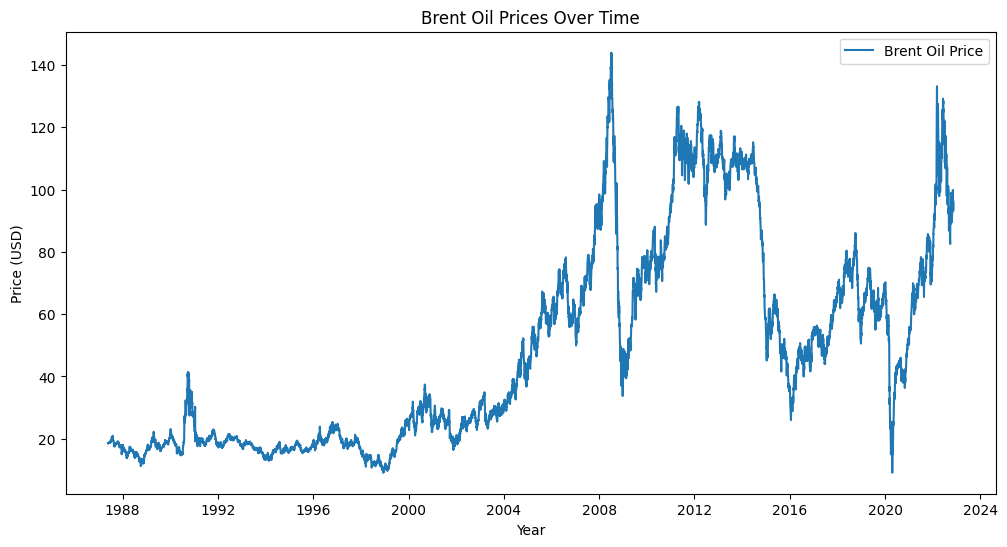

In [22]:
visualizer(df)

IndexError: single positional indexer is out-of-bounds

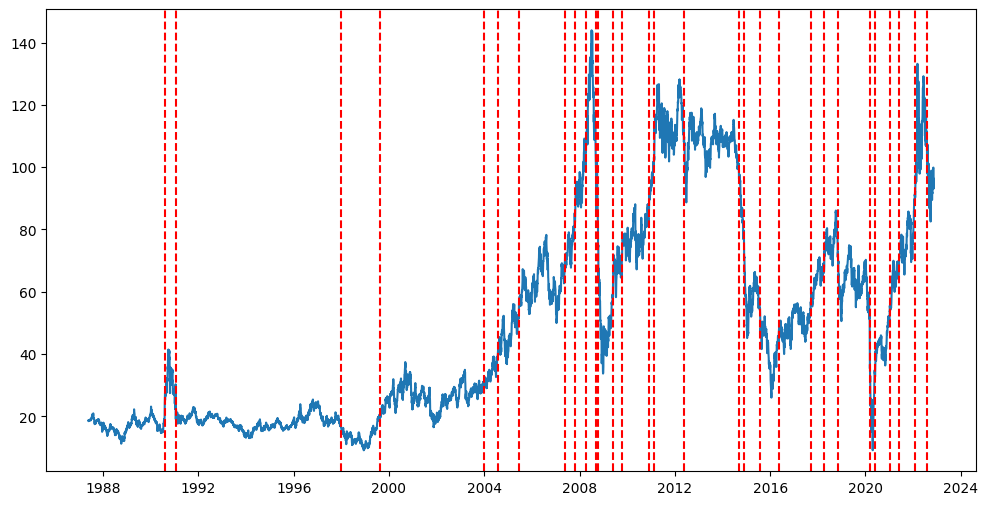

: 

In [24]:
import ruptures as rpt

# Apply change point detection using the Pelt method
algo = rpt.Pelt(model="rbf").fit(df["Price"].values)
change_points = algo.predict(pen=10)

# Plot detected change points
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price")
for cp in change_points:
    plt.axvline(df["Date"].iloc[cp], color="red", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Change Point Detection in Brent Oil Prices")
plt.legend()
plt.show()
